In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
model=tf.keras.Sequential(keras.layers.Dense(units=1,input_shape=[1]))

In [ ]:
x=np.array([1.0,2.0,3.0,4.0,5.0],dtype=float)
y=np.array([100,150,200,250,300],dtype=float)

In [ ]:
model.compile(optimizer='sgd',loss=keras.losses.mean_squared_error)
model.fit(x,y,epochs=500)

In [ ]:
model.predict([7.0])

1/1 [==============================] - 0s 105ms/step


array([[405.74026]], dtype=float32)

# ***SOFTMAX***

In [ ]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]


In [ ]:
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

sum of outputs: 1.0
class with highest probability: 2


# ***CLOTH IDENTIFICATION***

In [ ]:
dress_data=tf.keras.datasets.fashion_mnist
(a_image,a_label),(b_image,b_label)=dress_data.load_data()


2


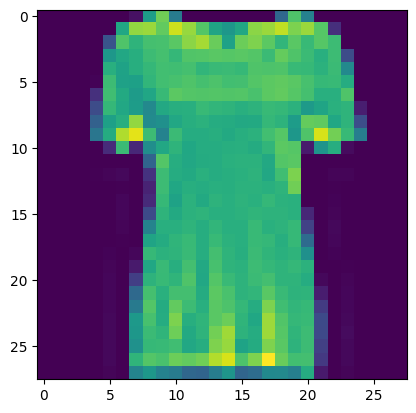

In [ ]:
plt.imshow(a_image[10])
np.set_printoptions(linewidth=320)
print(a_label[45])

In [ ]:
a_image=a_image/255    #to normalize value between 0 and 1 since this pixel value contains from 0 to 255
b_image=b_image/255

In [ ]:
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam

In [ ]:
class cback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('loss')>0.4):
      self.model.stop_training=True
cb=cback()

In [ ]:
model=tf.keras.Sequential([keras.layers.Flatten(),keras.layers.Dense(units=128,activation='relu'),keras.layers.Dense(units=10,activation='softmax')])

In [ ]:
model.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(a_image,a_label,epochs=60,callbacks=[cb])

In [ ]:
model.evaluate(b_image,b_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.5740 - accuracy: 0.8871


[0.5739753246307373, 0.8870999813079834]

In [ ]:
print(b_label[0])

9


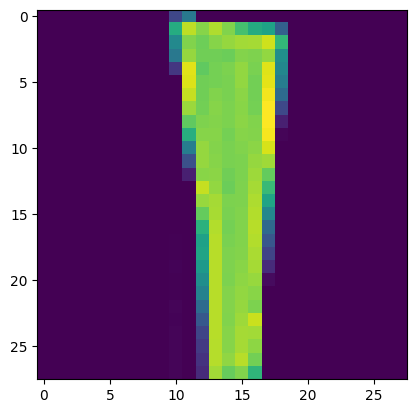

In [ ]:
plt.imshow(b_image[701])

# ***handwritten data***

In [ ]:
data=tf.keras.datasets.mnist

In [ ]:
(c_image,c_label),(d_image,d_label)=data.load_data()

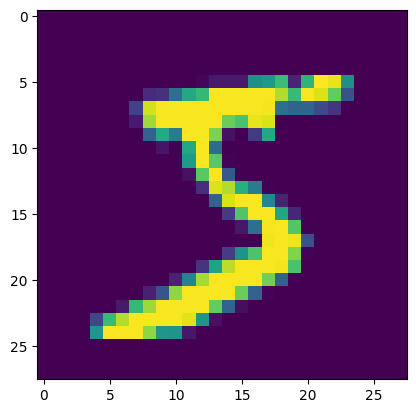

In [ ]:
plt.imshow(c_image[0])

In [ ]:
np.set_printoptions(linewidth=320)
print(c_label[0])

5


In [ ]:
print(c_label)

[5 0 4 ... 5 6 8]


In [ ]:
c_image=c_image/255
d_image=d_image/255
from keras.losses import SparseCategoricalCrossentropy

In [ ]:
model=tf.keras.Sequential([keras.layers.Flatten(),keras.layers.Dense(units=400,activation='relu'),keras.layers.Dense(units=10,activation='softmax')])

In [ ]:
class cbc(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>.98):
      self.model.stop_training=True
cbs=cbc()

In [ ]:

model.compile(optimizer='Adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
model.fit(c_image,c_label,epochs=14,callbacks=[cbs])

Epoch 1/14
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2100 - accuracy: 0.9383
Epoch 2/14
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0827 - accuracy: 0.9748
Epoch 3/14
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0547 - accuracy: 0.9831


In [ ]:
model.evaluate(d_image,d_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9786


[0.06794280558824539, 0.978600025177002]

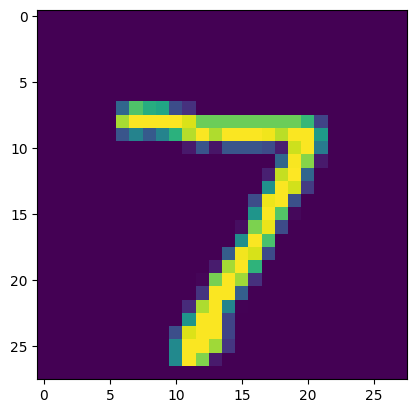

In [ ]:
plt.imshow(d_image[0])

In [ ]:
print(d_label[0])

# ***Fashion mnist using convolution and pooling***

In [ ]:
import tensorflow as tf
from os import path, getcwd, chdir
import matplotlib.pyplot as plt


In [ ]:
path = f"{getcwd()}/../tmp2/mnist.npz"

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [ ]:
class cbc(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,log={}):
    if(log.get('accuracy')>0.98):
      self.model.stop_training= True
cb=cbc()

mnist = tf.keras.datasets.mnist
(trainim, trainlab), (testim, testlab) = mnist.load_data()
trainim.shape
testim.shape

11490434/11490434 [==============================] - 0s 0us/step


(10000, 28, 28)

In [ ]:
trainim = trainim.reshape([60000, 28, 28, 1])
trainim=trainim/255
testim = testim.reshape([10000, 28, 28, 1])
testim=testim/255

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(28, 28, 1)),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=128,activation='relu'),
                           tf.keras.layers.Dense(units=10,activation='softmax')]
                           )
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(trainim,trainlab,epochs=19,callbacks=[cb])

Epoch 1/19
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1254 - accuracy: 0.9617
Epoch 2/19
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0410 - accuracy: 0.9873


In [ ]:
model.evaluate(testim,testlab)

313/313 [==============================] - 6s 19ms/step - loss: 0.0340 - accuracy: 0.9893


[0.034047167748212814, 0.989300012588501]

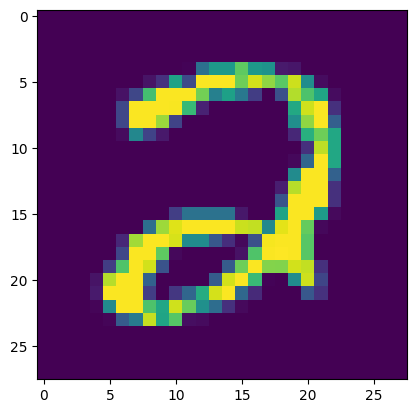

In [ ]:
plt.imshow(testim[106])

In [ ]:
print(testlab[106])

2


# ***IMAGE GENERATOR***

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-08-23 14:32:20--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.253.114.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   230MB/s    in 0.6s    

2023-08-23 14:32:21 (230 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import zipfile
a='./horse-or-human.zip'
b=zipfile.ZipFile(a,'r')
b.extractall('./horse-or-human')
b.close()

In [ ]:
import os
t_ho=os.path.join('./horse-or-human/horses')
t_hu=os.path.join('./horse-or-human/humans')
c=os.listdir(t_ho)
d=os.listdir(t_hu)

In [ ]:
print(len(c))

500


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols =4
ind=0

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

ind += 8
next_horse_pix = [os.path.join(t_ho, fname)
                for fname in c[ind-8:ind]]
next_human_pix = [os.path.join(t_hu, fname)
                for fname in d[ind-8:ind]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
model=tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),tf.keras.layers.MaxPool2D(2,2),
                                                   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                                    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
                                                     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                                   tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
                                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                           tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
                                                 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                            tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
                                                   tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
                                           tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
                                                      tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
p=ImageDataGenerator(rescale=1/255)
l=p.flow_from_directory('./horse-or-human/',target_size=(300,300),batch_size=128,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
h=model.fit(
    l,epochs=4,
    steps_per_epoch=8,
    validation_steps=8)

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img= load_img(path, target_size=(300,300))
  x=img_to_array(img)
  x/=255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]<0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
